In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
from pandas_datareader import data, wb

In [14]:
from datetime import datetime

In [15]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [16]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [18]:
end

datetime.datetime(2017, 3, 8, 16, 47, 21, 731085)

In [25]:
 for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [28]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,109.728373,110.598452,109.072182,109.908055,3.434319e+07,108.797955
std,11.163064,11.172169,11.252610,11.278529,1.533216e+07,11.712345
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,100.584999,101.715002,100.047501,100.875000,2.579102e+07,98.936297
50%,109.034999,110.159999,108.349998,109.290001,3.006785e+07,108.008132
75%,115.800003,116.512501,115.280002,116.027499,3.715422e+07,115.357359
max,140.000000,140.279999,138.789993,139.789993,1.146021e+08,139.789993


In [29]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-03-08 to 2017-03-07
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


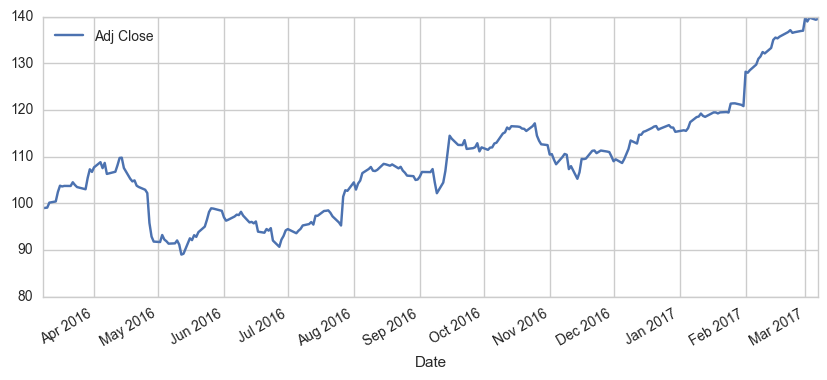

In [31]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

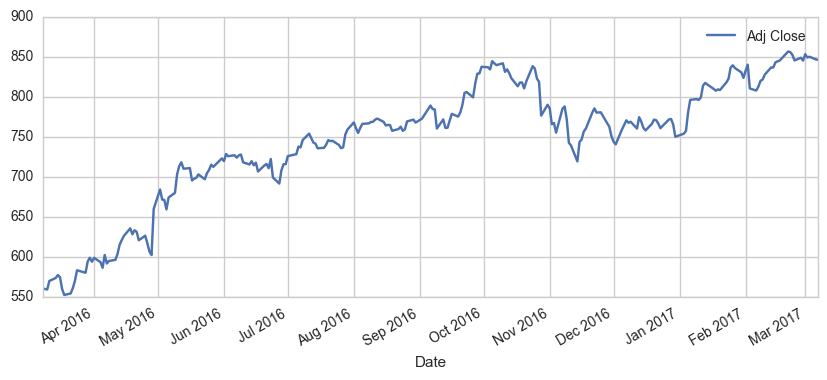

In [32]:
AMZN['Adj Close'].plot(legend=True, figsize=(10,4))

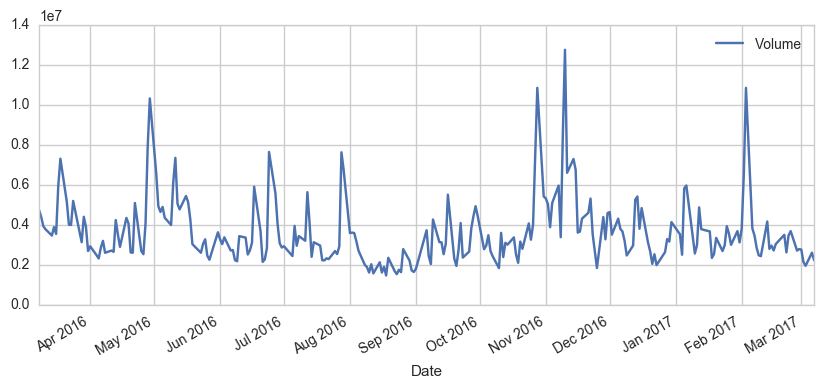

In [35]:
AMZN['Volume'].plot(legend=True, figsize=(10,4))

In [39]:
moving_average_day = [10, 20, 30]

for ma in moving_average_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma).mean()

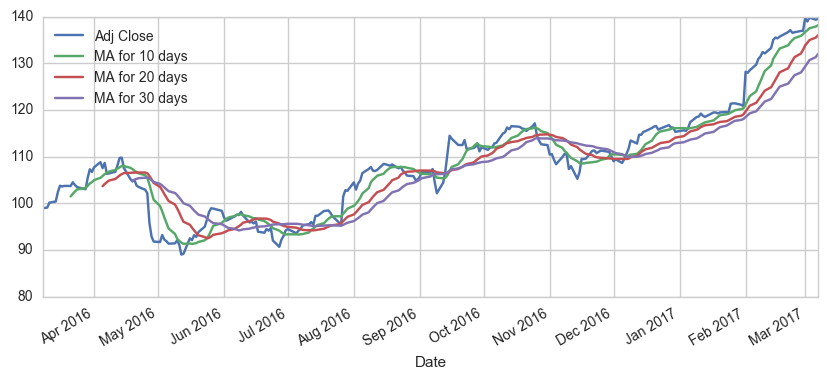

In [40]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(subplots= False, figsize= (10, 4))

In [42]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

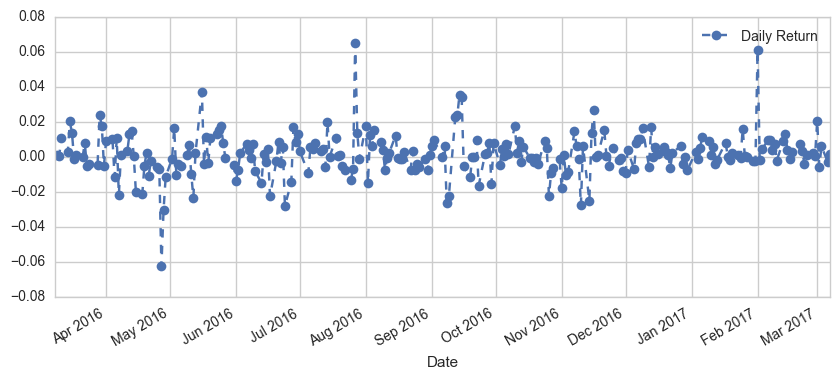

In [45]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

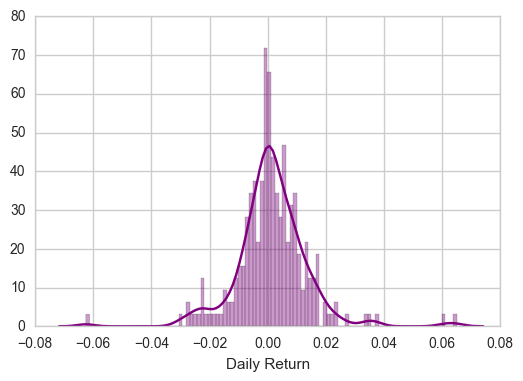

In [46]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

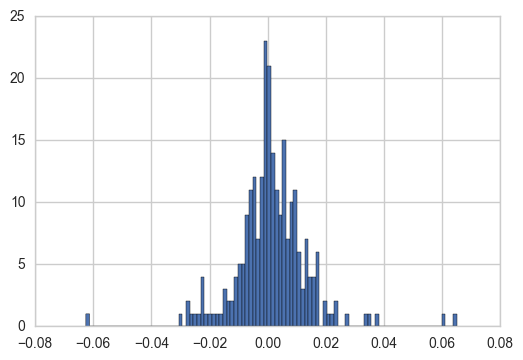

In [49]:
AAPL['Daily Return'].hist(bins=100)

In [50]:
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [51]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-03-08,98.938415,560.260010,693.969971,50.326400
2016-03-09,99.026556,559.469971,705.239990,51.485903
2016-03-10,99.075516,558.929993,712.820007,50.716147
2016-03-11,100.142954,569.609985,726.820007,51.710009
2016-03-14,100.397566,573.369995,730.489990,51.807445


In [52]:
tech_returns = closing_df.pct_change()

In [53]:
tech_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-03-08,NaN,NaN,NaN,NaN
2016-03-09,0.000891,-0.001410,0.016240,0.023040
2016-03-10,0.000494,-0.000965,0.010748,-0.014951
2016-03-11,0.010774,0.019108,0.019640,0.019597
2016-03-14,0.002542,0.006601,0.005049,0.001884


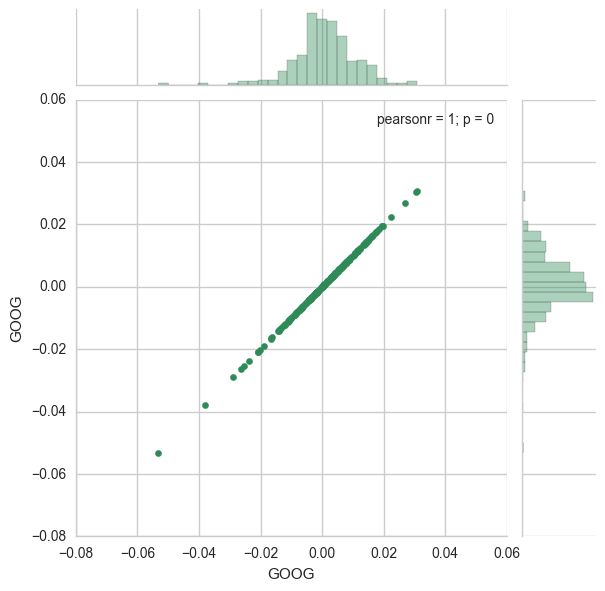

In [55]:
sns.jointplot('GOOG','GOOG', tech_returns, kind='scatter', color ='seagreen')

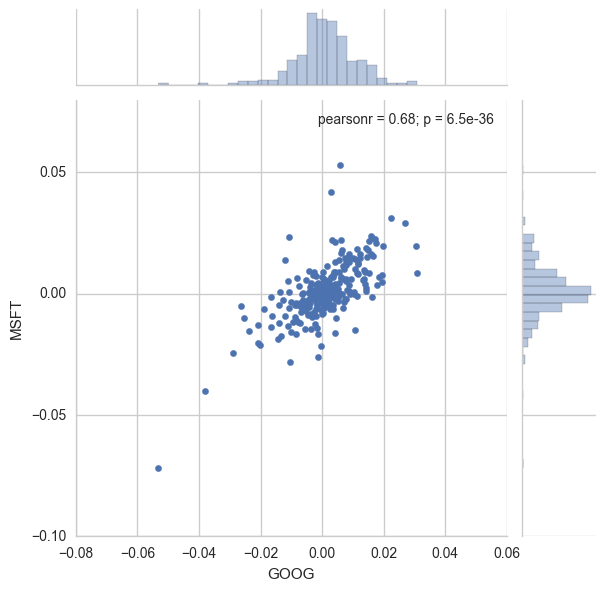

In [56]:
sns.jointplot('GOOG','MSFT', tech_returns, kind='scatter')

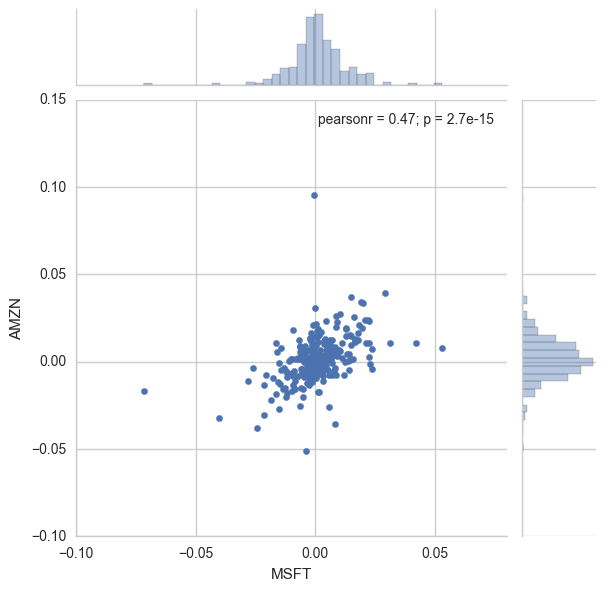

In [59]:
sns.jointplot('MSFT','AMZN', tech_returns, kind='scatter')

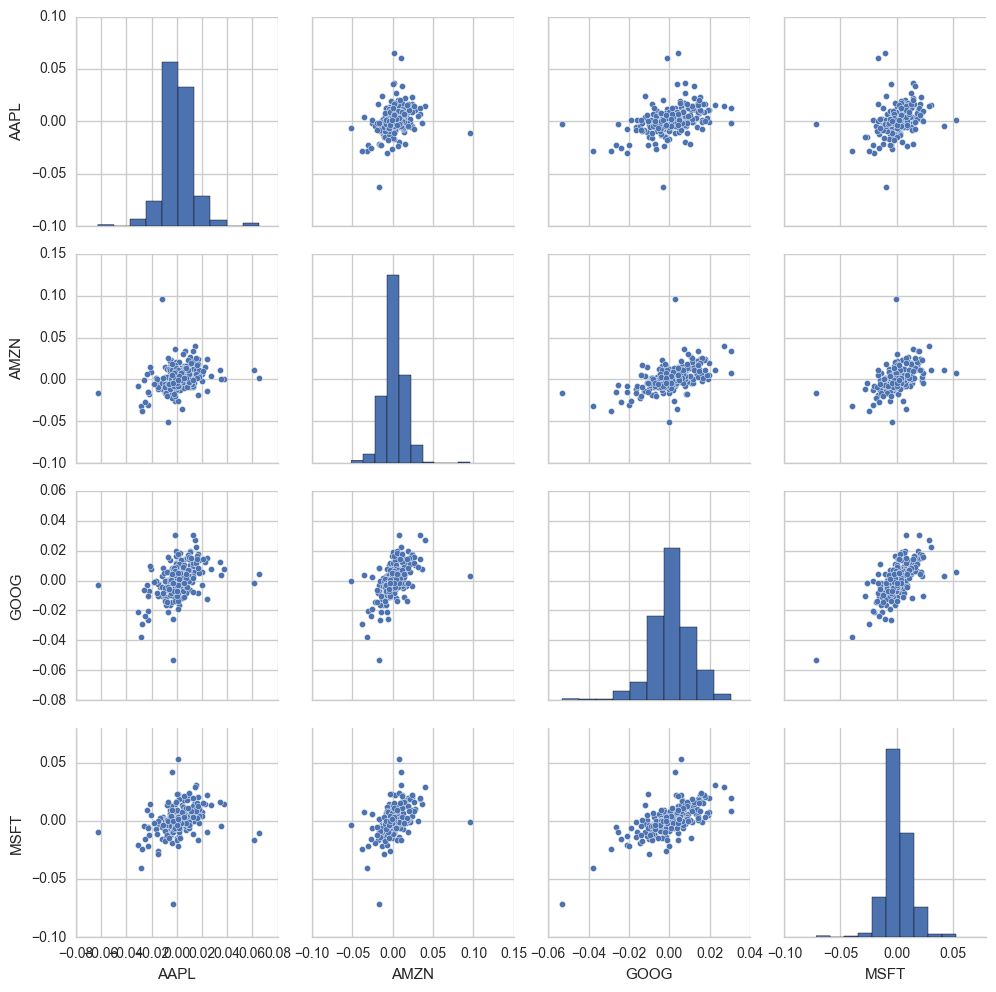

In [60]:
sns.pairplot(tech_returns.dropna())

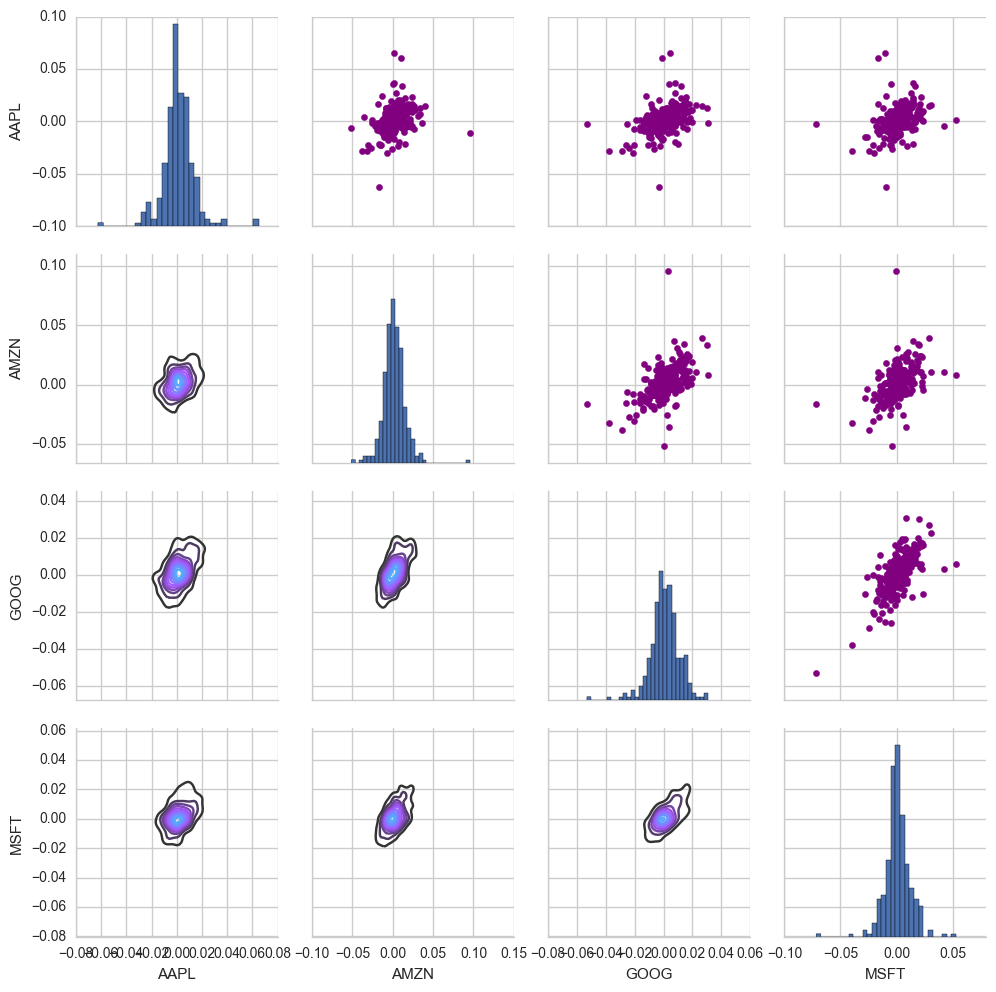

In [61]:
returns_fig = sns.PairGrid(tech_returns.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

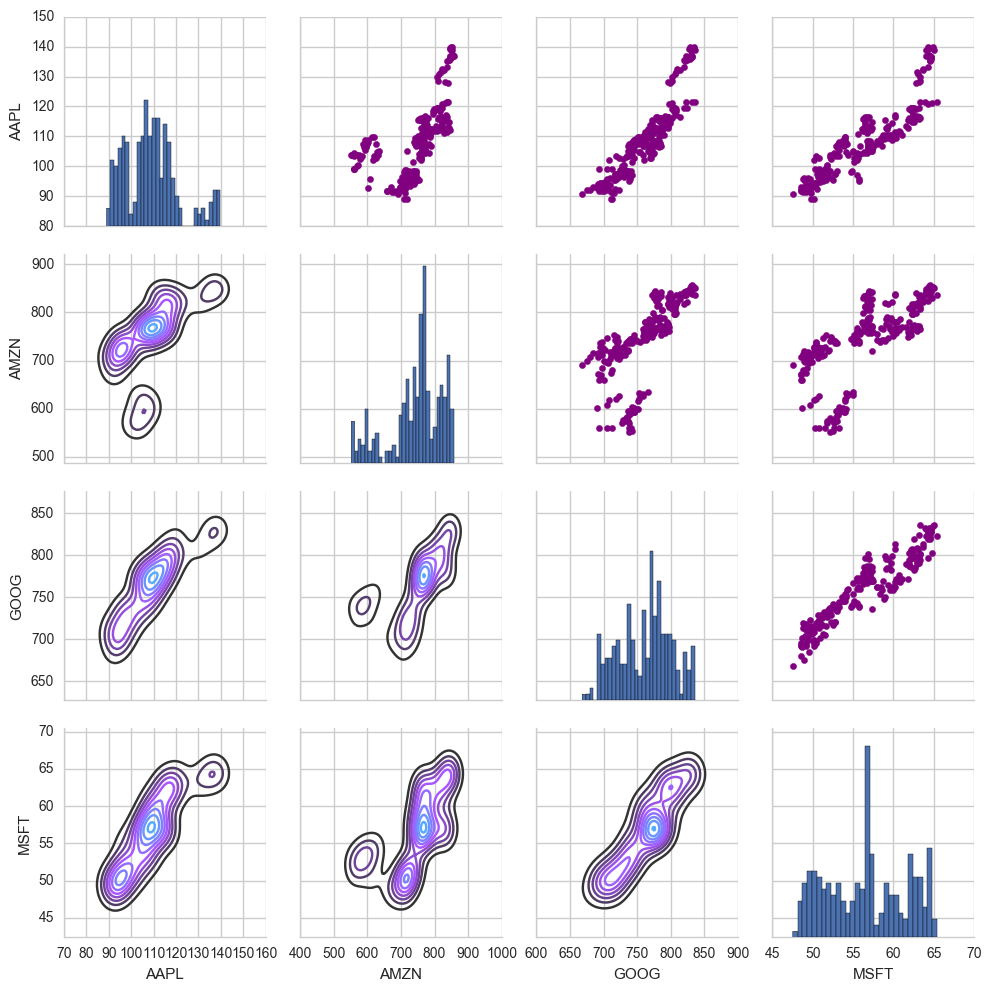

In [62]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

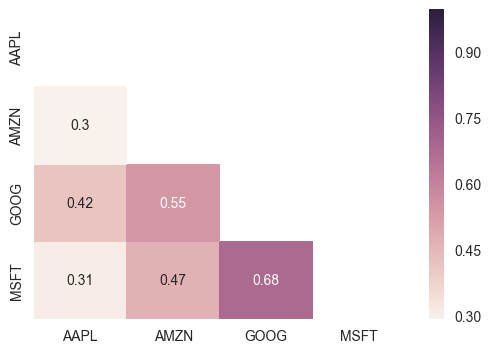

In [72]:
mask = np.zeros_like(tech_returns.dropna().corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(tech_returns.dropna().corr(), annot=True, mask=mask)

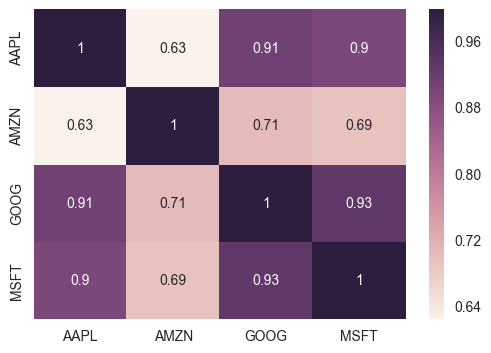

In [67]:
sns.heatmap(closing_df.corr(), annot=True)

In [73]:
returns = tech_returns.dropna()

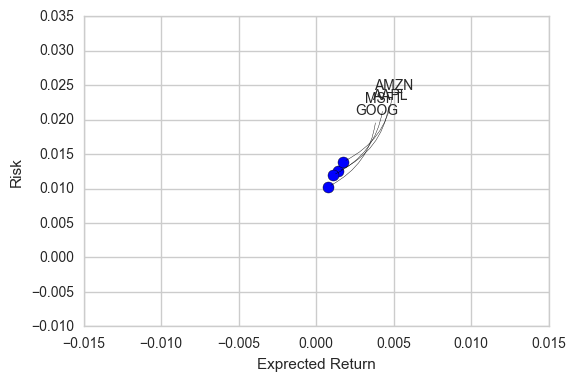

In [80]:
area = np.pi*20

plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Exprected Return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

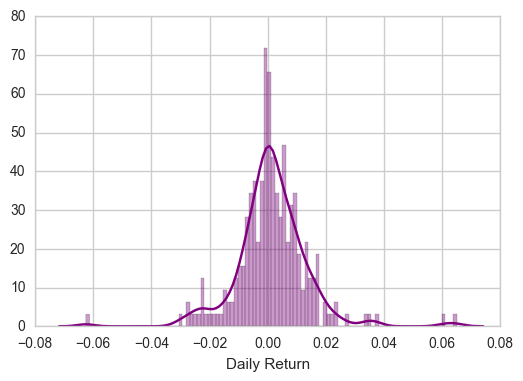

In [81]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [82]:
returns['AAPL'].quantile(0.05)

-0.018962552989303643

95% confidence the daily returns will not below -0.018

In [89]:
days = 365

dt = 1/days

mu = returns.mean()['GOOG']

sigma = returns.std()['GOOG']

In [90]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + price[x-1] * (drift[x] + shock[x])
        
    return price

In [91]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-03-08,688.590027,703.789978,685.340027,693.969971,2076300,693.969971
2016-03-09,698.469971,705.679993,694.000000,705.239990,1421500,705.239990
2016-03-10,708.119995,716.440002,703.359985,712.820007,2833500,712.820007
2016-03-11,720.000000,726.919983,717.125000,726.820007,1970800,726.820007
2016-03-14,726.809998,735.500000,725.150024,730.489990,1718300,730.489990


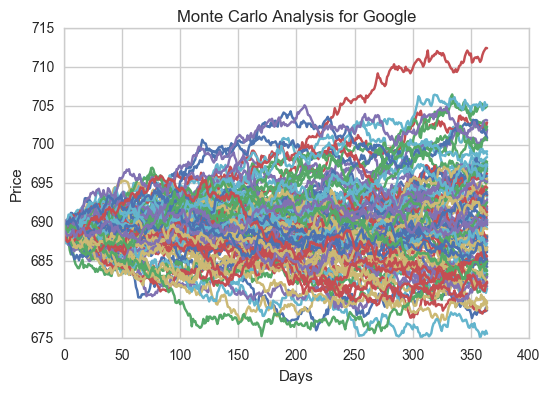

In [92]:
start_price = 688.59

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [93]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

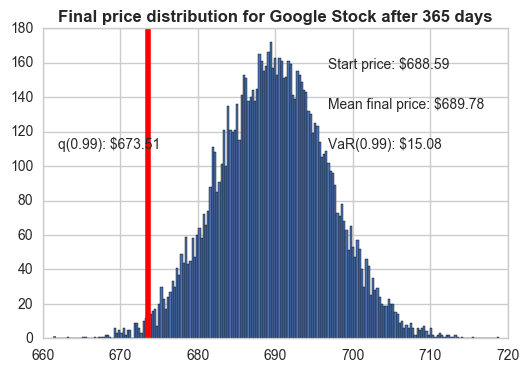

In [97]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6,0.8, s = 'Start price: $%.2f' %start_price)
plt.figtext(0.6,0.7, s = 'Mean final price: $%.2f' %simulations.mean())
plt.figtext(0.6,0.6, s = 'VaR(0.99): $%.2f' % (start_price-q))
plt.figtext(0.15,0.6, s = 'q(0.99): $%.2f' %q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title('Final price distribution for Google Stock after %s days' %days, weight='bold')

In [98]:
AMZN.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-03-08,557.869995,571.349976,554.739990,560.260010,4730000,560.260010
2016-03-09,559.559998,560.349976,550.130005,559.469971,4377300,559.469971
2016-03-10,566.739990,567.000000,547.900024,558.929993,3919900,558.929993
2016-03-11,566.950012,570.059998,562.729980,569.609985,3771300,569.609985
2016-03-14,567.000000,576.890015,563.049988,573.369995,3454200,573.369995


In [99]:
start_price = 557.87

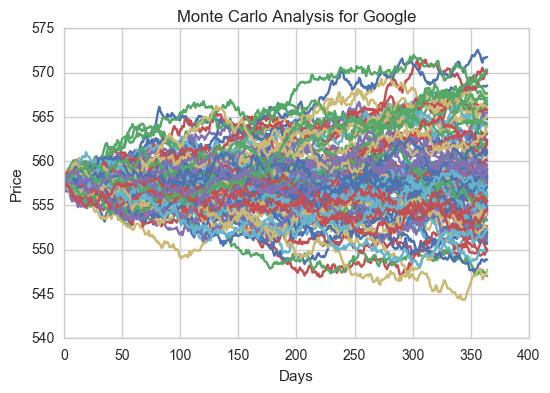

In [100]:
for r in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [101]:
runs = 10000
simulations = np.zeros(runs)
for r in range(runs):
    simulations[r] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    

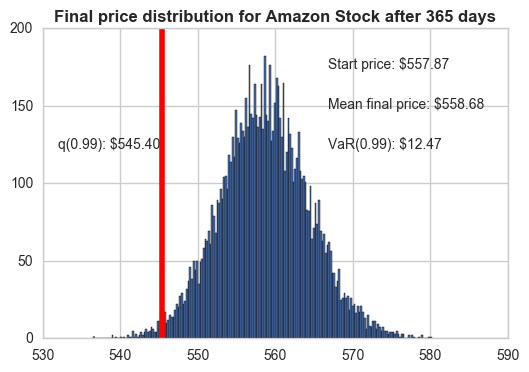

In [103]:
q= np.percentile(simulations,1)
plt.hist(simulations, bins=200)
plt.figtext(0.6,0.8, s = 'Start price: $%.2f' %start_price)
plt.figtext(0.6,0.7, s = 'Mean final price: $%.2f' %simulations.mean())
plt.figtext(0.6,0.6, s = 'VaR(0.99): $%.2f' % (start_price-q))
plt.figtext(0.15,0.6, s = 'q(0.99): $%.2f' %q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title('Final price distribution for Amazon Stock after %s days' %days, weight='bold')